In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


C:\Users\hemanth\AppData\Local\Temp\ipykernel_27836\2288955041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.Age.dropna())


<AxesSubplot: xlabel='Age', ylabel='Density'>

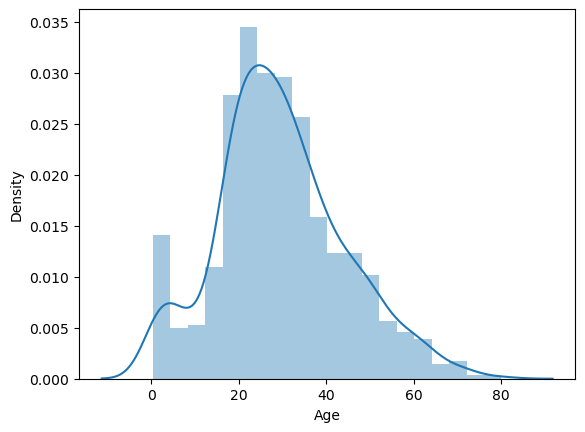

In [6]:
sb.distplot(df.Age.dropna())

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

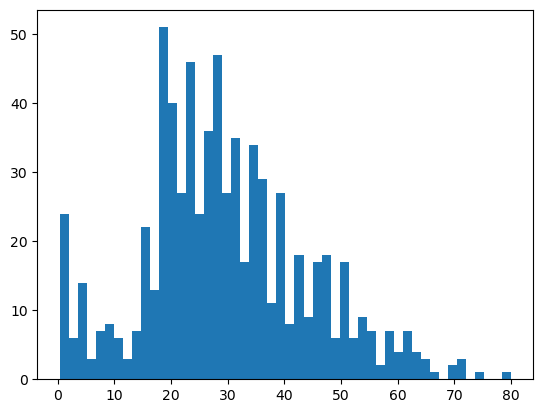

In [7]:
plt.hist(df.Age,bins=50)

<AxesSubplot: >

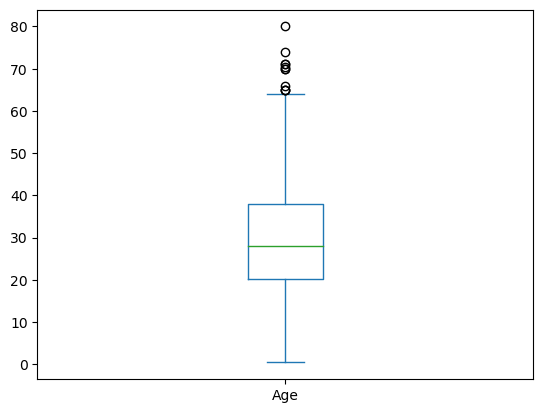

In [8]:
df['Age'].plot.box()

In [52]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
upper_boundary=df.Age.mean()+3*df.Age.std()
lower_boundary=df.Age.mean()-3*df.Age.std()
print(lower_boundary,'\n',upper_boundary)

-13.88037434994331 
 73.27860964406095


In [22]:
#lets calculate the Interquantile Range(75%-25%)
IQR=df.Age.describe()[6]-df.Age.describe()[4]

In [23]:
IQR

17.875

In [29]:
lower_bridge=df.Age.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Age.quantile(0.75)+(IQR*1.5)
print(lower_bridge,'\n',upper_bridge)

-6.6875 
 64.8125


In [28]:
#Extreme Outliers

lower_bridge1=df.Age.quantile(0.25)-(IQR*3.0)
upper_bridge1=df.Age.quantile(0.75)+(IQR*3.0)
print(lower_bridge1,'\n',upper_bridge1)

-33.5 
 91.625


#### Feature is skewed

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.      ,  10.246584,  20.493168,  30.739752,  40.986336,
         51.23292 ,  61.479504,  71.726088,  81.972672,  92.219256,
        102.46584 , 112.712424, 122.959008, 133.205592, 143.452176,
        153.69876 , 163.945344, 174.191928, 184.438512, 194.685096,
        204.93168 , 215.178264, 225.424848, 235.671432, 245.918016,
        256.1646  , 266.411184, 276.657768, 286.904352, 297.150936,
        307.39752 , 317.644104, 327.890688, 338.137272, 348.383856,
        358.63044 , 368.877024, 379.123608, 389.370192, 399.616776,
        409.86336 , 420.109944, 430.356528, 440.603112, 450.849696,
        461.09628 , 471.342864, 481.589448, 49

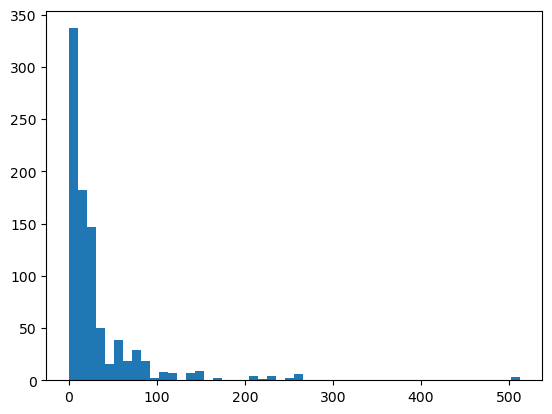

In [38]:
plt.hist(df.Fare,bins=50)

C:\Users\hemanth\AppData\Local\Temp\ipykernel_3620\2780761370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.Fare)


<AxesSubplot: xlabel='Fare', ylabel='Density'>

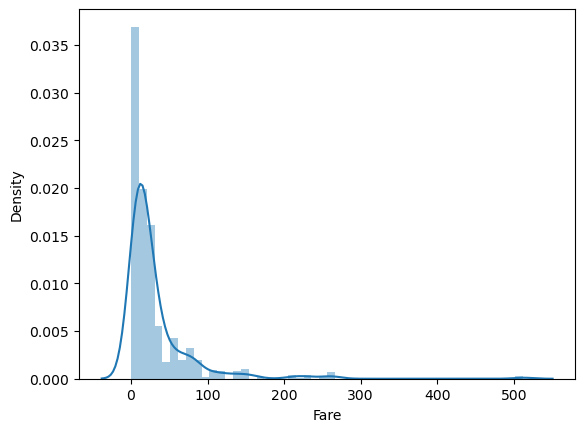

In [35]:
sb.distplot(df.Fare)

<AxesSubplot: >

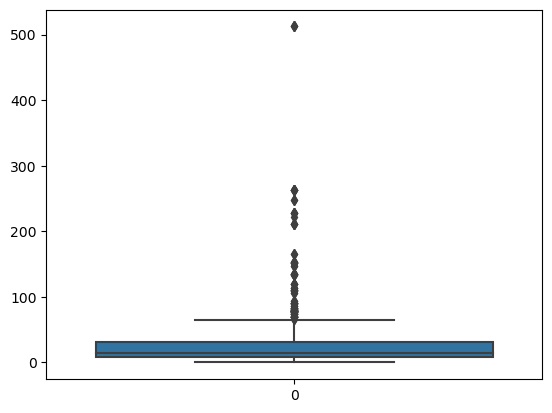

In [37]:
sb.boxplot(df.Fare)

In [39]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
Upper_boundary=df.Fare.mean()+(3*df.Fare.std())
Lower_boundary=df.Fare.mean()-(3*df.Fare.std())
print(Upper_boundary,"\n",Lower_boundary)

181.28449376011736 
 -116.87607782296807


In [47]:
Iqr=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [48]:
Iqr

23.0896

In [49]:
Lower_bridge=df.Fare.quantile(0.25)-(Iqr*1.5)
Upper_bridge=df.Fare.quantile(0.75)+(Iqr*1.5)
print(Lower_bridge,'\n',Upper_bridge)

-26.724 
 65.6344


In [53]:
#Extreme outliers
Lower_bridge1=df.Fare.quantile(0.25)-(Iqr*3.0)
Upper_bridge1=df.Fare.quantile(0.75)+(Iqr*3.0)
print(Lower_bridge1,'\n',Upper_bridge1)

-61.358399999999996 
 100.2688


In [93]:
data=df.copy()

In [94]:
data['Age'].fillna(data.Age.median(),inplace=True)

In [95]:
data[data['Age']>65]=65

In [97]:
data[data['Age']<lower_bridge]=lower_bridge

{'whiskers': [<matplotlib.lines.Line2D at 0x208ef0f2830>,
 'caps': [<matplotlib.lines.Line2D at 0x208ef0f2d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x208ef0f2620>],
 'medians': [<matplotlib.lines.Line2D at 0x208ef0f32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x208ef0f3550>],
 'means': []}

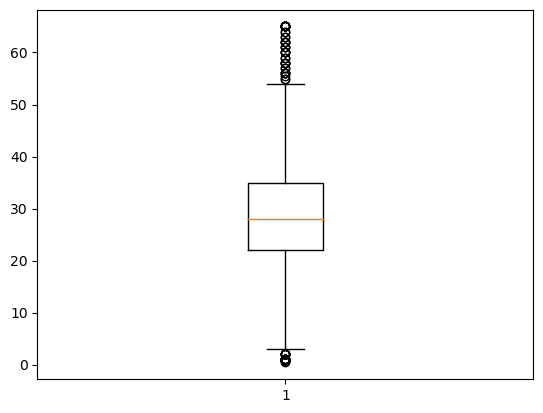

In [98]:
plt.boxplot(data.Age)

In [88]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [100]:
data[data['Fare']>100]=100

{'whiskers': [<matplotlib.lines.Line2D at 0x208ef171f90>,
 'caps': [<matplotlib.lines.Line2D at 0x208ef1724d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x208ef171cf0>],
 'medians': [<matplotlib.lines.Line2D at 0x208ef172a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x208ef172cb0>],
 'means': []}

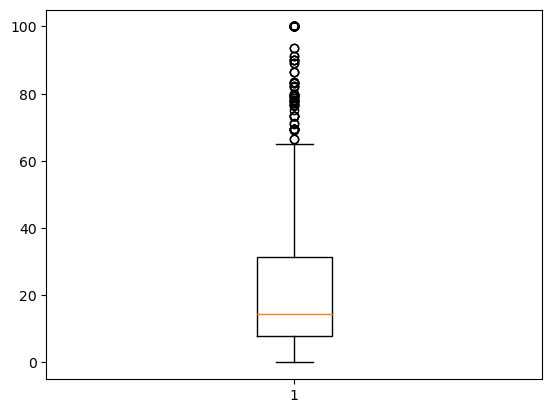

In [101]:
plt.boxplot(data.Fare)

(array([ 22.,  16.,   7.,   7.,  10.,   4.,   7.,  22.,  34.,  39.,  49.,
         42.,  41., 214.,  45.,  35.,  32.,  34.,  16.,  24.,  19.,  13.,
         16.,  18.,  12.,  13.,   9.,   7.,   4.,   6.,   7.,   3.,  11.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  53.]),
 array([  0.42  ,   2.4116,   4.4032,   6.3948,   8.3864,  10.378 ,
         12.3696,  14.3612,  16.3528,  18.3444,  20.336 ,  22.3276,
         24.3192,  26.3108,  28.3024,  30.294 ,  32.2856,  34.2772,
         36.2688,  38.2604,  40.252 ,  42.2436,  44.2352,  46.2268,
         48.2184,  50.21  ,  52.2016,  54.1932,  56.1848,  58.1764,
         60.168 ,  62.1596,  64.1512,  66.1428,  68.1344,  70.126 ,
         72.1176,  74.1092,  76.1008,  78.0924,  80.084 ,  82.0756,
         84.0672,  86.0588,  88.0504,  90.042 ,  92.0336,  94.0252,
         96.0168,  98.0084, 100.    ]),
 <BarContainer object of 50 artists>)

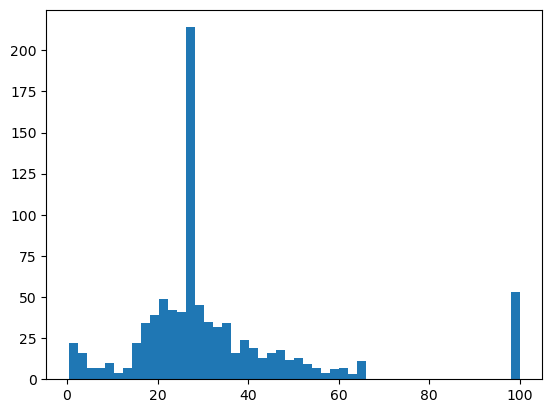

In [103]:
plt.hist(data.Age,bins=50)